In [1]:
%pip install seaborn
%pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import category_encoders as ce
%matplotlib inline
warnings.filterwarnings('ignore')

# Bayesian Classification + Support Vector Machine

Завантаження даних з файлу 'adult.csv' у DataFrame, встановлення заголовків стовпців та заміна всіх '?' на NaN в стовпцях 'workclass', 'occupation' та 'native_country'

In [3]:
data = 'adult.csv'
df = pd.read_csv(data, header=None, sep=',\s')

col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
             'marital_status', 'occupation', 'relationship', 'race', 'sex',
             'capital_gain', 'capital_loss', 'hours_per_week',
             'native_country', 'income']

df.columns = col_names
df.columns

df['workclass'].replace('?', np.NaN, inplace=True)
df['occupation'].replace('?', np.NaN, inplace=True)
df['native_country'].replace('?', np.NaN, inplace=True)

Розділення даних на навчальний і тестовий набори, і заповнення пропущених значень найчастішими значеннями з навчального набору.

In [4]:
X = df.drop(['income'], axis=1)
y = df['income']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0],
                                 inplace=True)

Встановлення кодування для нечисельних типів даних з набору

In [5]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status',
                                 'occupation', 'relationship', 'race', 'sex',
                                 'native_country'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

Стандартизація числових стовпців у навчальному та тестовому наборах даних

In [6]:
cols = X_train.columns

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

### Bayesian Classification

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, f1_score, accuracy_score

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

recall = recall_score(y_test, y_pred, pos_label="<=50K")
f1 = f1_score(y_test, y_pred, pos_label="<=50K")
accuracy = accuracy_score(y_test, y_pred)

print('Оцінка повноти (Recall): {:.4f}'.format(recall))
print('Оцінка F1: {:.4f}'.format(f1))
print('Оцінка точності (Accuracy): {:.4f}'.format(accuracy))

Оцінка повноти (Recall): 0.8099
Оцінка F1: 0.8650
Оцінка точності (Accuracy): 0.8083


Сonfusion matrix моделі

<Axes: >

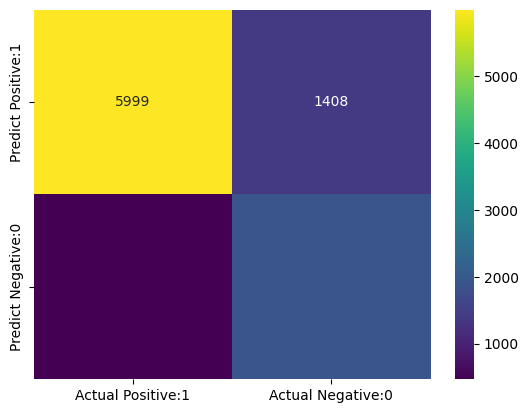

In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1',
                                           'Actual Negative:0'],
index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')

Метрики моделі

In [8]:
print('Оцінка на навчальному наборі: {:.4f}'.format(gnb.score(X_train,
                                                              y_train)))
print('Оцінка на тестовому наборі: {:.4f}'.format(gnb.score(X_test, y_test)))

values = y_test.value_counts()
null_accuracy = values.max() / values.sum()
print('Оцінка нульової точності: {:.4f}'.format(null_accuracy))

Оцінка на навчальному наборі: 0.8067
Оцінка на тестовому наборі: 0.8083
Оцінка нульової точності: 0.7582


Модель має точність на рівні 0.8083, тоді як нульова точність становить 0.7582. Це може свідчити про те, що наша модель успішно вирізняє мітки класів при передбаченні.

### Support Vector Machine

Оцінка повноти (Recall): 0.9694
Оцінка F1: 0.8818
Оцінка точності (Accuracy): 0.8029


<Axes: >

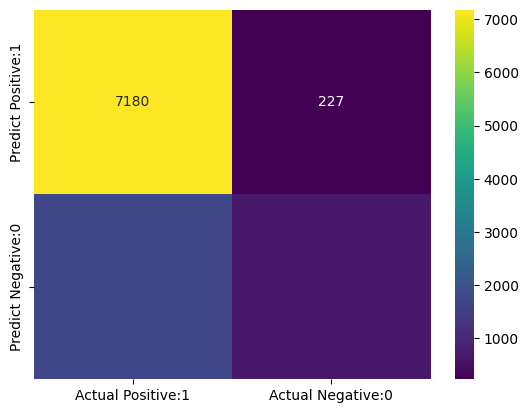

In [9]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

recall = recall_score(y_test, y_pred, pos_label="<=50K")
f1 = f1_score(y_test, y_pred, pos_label="<=50K")
accuracy = accuracy_score(y_test, y_pred)

print('Оцінка повноти (Recall): {:.4f}'.format(recall))
print('Оцінка F1: {:.4f}'.format(f1))
print('Оцінка точності (Accuracy): {:.4f}'.format(accuracy))

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1',
                                           'Actual Negative:0'],
index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')

In [11]:
training_score = svc.score(X_train, y_train)
test_score = svc.score(X_test, y_test)

print('Оцінка на навчальному наборі: {:.4f}'.format(training_score))
print('Оцінка на тестовому наборі: {:.4f}'.format(test_score))

Оцінка на навчальному наборі: 0.8021
Оцінка на тестовому наборі: 0.8029


Оцінка моделі на навчальному наборі дорівнює 0.8021, а на тестовому - 0.8029. Ці два значення досить близькі, що вказує на відсутність перенавчання моделі.

Оцінка моделі становить 0.8029, при цьому нульова точність складає 0.7582. З цього можна зробити висновок, що наша модель успішно передбачає мітки класів.

Отже видно, що Naive Bayes Classifier дає нам кращі результати, ніж Support Vector Machine.

# K Nearest Neighbors

In [12]:
from sklearn import preprocessing

df = pd.read_csv('teleCust1000t.csv')
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
        'employ', 'retire', 'gender', 'reside']].values
y = df['custcat'].values

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=4)

### KNN with Euclidean distance

Оцінка повноти (Recall): 0.3401
Оцінка F1: 0.3300
Оцінка точності (Accuracy): 0.3400
Оцінка на навчальному наборі: 0.5025
Оцінка на тестовому наборі: 0.3400


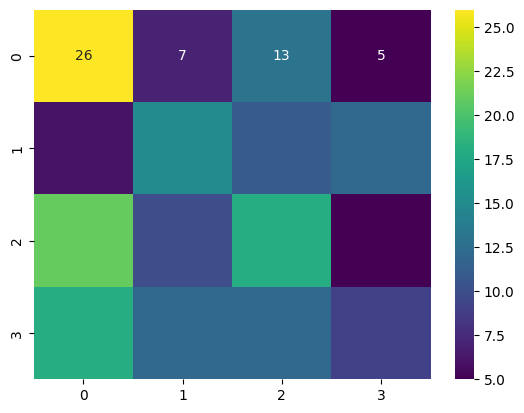

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print('Оцінка повноти (Recall): {:.4f}'.format(recall))
print('Оцінка F1: {:.4f}'.format(f1))
print('Оцінка точності (Accuracy): {:.4f}'.format(accuracy))

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')

training_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print('Оцінка на навчальному наборі: {:.4f}'.format(training_score))
print('Оцінка на тестовому наборі: {:.4f}'.format(test_score))

Оцінка моделі на навчальному наборі становить 0.5025, а на тестовому - 0.34. Ці два значення суттєво відрізняються одне від одного, що може свідчити про наявність оферфітінгу (недообчислення) моделі.

In [14]:
values = pd.Series(y_test).value_counts()
null_accuracy = values.max() / values.sum()
print('Оцінка нульової точності: {:.4f}'.format(null_accuracy))

Оцінка нульової точності: 0.2700


Модель отримала оцінку 0.34, а нульова точність складає 0.27. З цього можна зробити висновок, що наша модель, яка використовує евклідову метрику, є кращою за базову модель.

### KNN with Manhattan distance

Оцінка повноти (Recall): 0.3369
Оцінка F1: 0.3310
Оцінка точності (Accuracy): 0.3400


<Axes: >

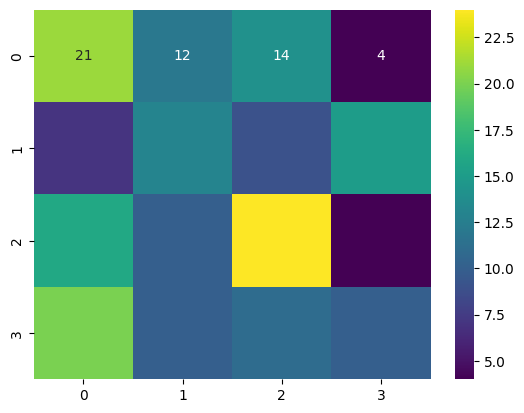

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9, metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print('Оцінка повноти (Recall): {:.4f}'.format(recall))
print('Оцінка F1: {:.4f}'.format(f1))
print('Оцінка точності (Accuracy): {:.4f}'.format(accuracy))

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')

In [16]:
training_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print('Оцінка на навчальному наборі: {:.4f}'.format(training_score))
print('Оцінка на тестовому наборі: {:.4f}'.format(test_score))

Оцінка на навчальному наборі: 0.4875
Оцінка на тестовому наборі: 0.3400


Оцінка моделі на навчальному наборі дорівнює 0.4875, а на тестовому - 0.34. Ці два значення виявляють велику різницю, що може свідчити про перенавчання (оферфітінг) моделі.

Модель має оцінку 0.34, тоді як нульова точність становить 0.27. Це може вказувати на те, що наша модель з використанням метрики Манхеттен є кращою за базову модель.

### KNN with Minkowski distance

Оцінка повноти (Recall): 0.3401
Оцінка F1: 0.3300
Оцінка точності (Accuracy): 0.3400


<Axes: >

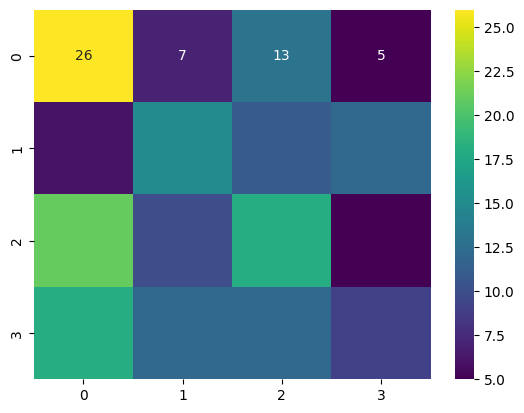

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print('Оцінка повноти (Recall): {:.4f}'.format(recall))
print('Оцінка F1: {:.4f}'.format(f1))
print('Оцінка точності (Accuracy): {:.4f}'.format(accuracy))

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')

In [18]:
training_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print('Оцінка на навчальному наборі: {:.4f}'.format(training_score))
print('Оцінка на тестовому наборі: {:.4f}'.format(test_score))

Оцінка на навчальному наборі: 0.5025
Оцінка на тестовому наборі: 0.3400


Оцінка моделі на навчальному наборі становить 0.5025, а на тестовому - 0.34. Ці два значення близькі одне до одного, але не однозначно подібні, що може викликати підозру на перенавчання (оферфітинг).

Модель отримала оцінку 0.34, в той час як нульова точність становить 0.27. З цього можна побачити, що наша модель, яка використовує метрику Манхеттен, виявилася кращою, ніж базова модель.

З усього вищевказаного можна зробити висновок, що наша модель KNN з використанням манхеттенської метрики є найбільш ефективною.

# Agnes, Birch, DBSCAN

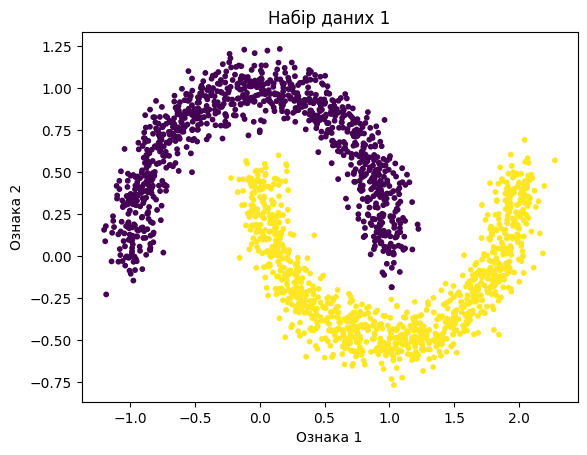

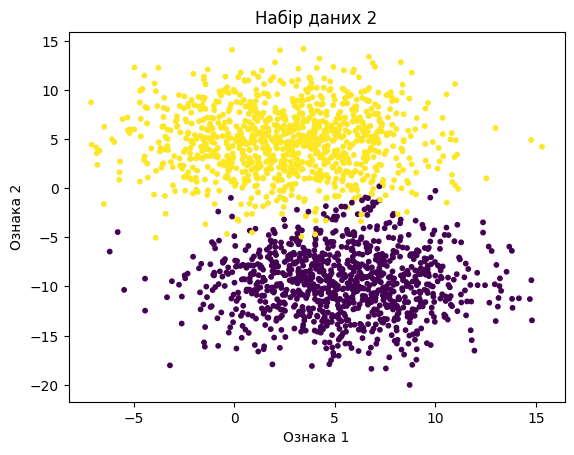

In [19]:
from sklearn import datasets
from sklearn.datasets import make_blobs

X1, Y1 = datasets.make_moons(n_samples=2000, noise=.09, random_state=10)
plt.scatter(X1[:, 0], X1[:, 1], s=10, c=Y1)
plt.title('Набір даних 1')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.show()

X3, Y3 = make_blobs(n_samples=2000, cluster_std=3.5, centers=2, n_features=2,
                    random_state=10)
plt.scatter(X3[:, 0], X3[:, 1], s=10, c=Y3)
plt.title('Набір даних 2')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.show()

### Agnes

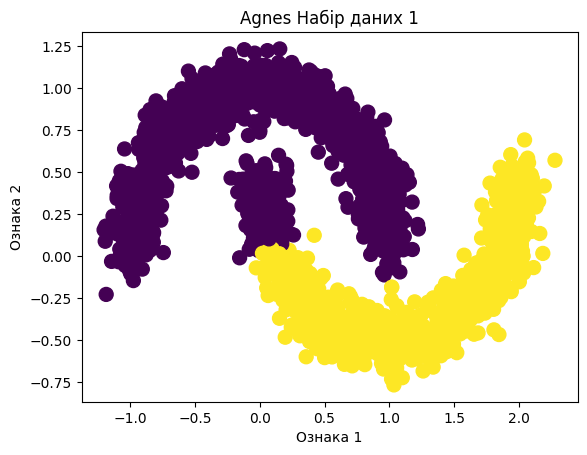

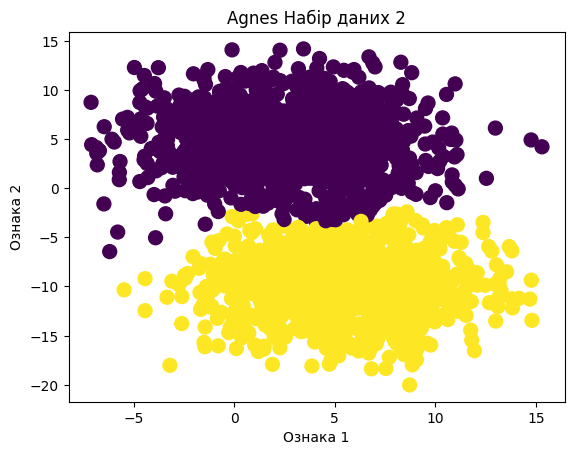

In [20]:
from sklearn.cluster import AgglomerativeClustering

agnes_1 = AgglomerativeClustering(n_clusters=2)
y_agnes_1 = agnes_1.fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y_agnes_1)
plt.title('Agnes Набір даних 1')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.show()

agnes_2 = AgglomerativeClustering(n_clusters=2)
y_agnes_2 = agnes_2.fit_predict(X3)
plt.scatter(X3[:, 0], X3[:, 1], s=100, c=y_agnes_2)
plt.title('Agnes Набір даних 2')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.show()

In [21]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

silhouette_agnes_1 = silhouette_score(X1, y_agnes_1)
ari_agnes_1 = adjusted_rand_score(Y1, y_agnes_1)
nmi_agnes_1 = normalized_mutual_info_score(Y1, y_agnes_1)

print('Набір даних 1 (Agnes) - Silhouette Score:{:.4f}'.
      format(silhouette_agnes_1))
print('Набір даних 1 (Agnes) - ARI Score: {:.4f}'.format(ari_agnes_1))
print('Набір даних 1 (Agnes) - NMI Score: {:.4f}'.format(nmi_agnes_1))

Набір даних 1 (Agnes) - Silhouette Score:0.4062
Набір даних 1 (Agnes) - ARI Score: 0.7156
Набір даних 1 (Agnes) - NMI Score: 0.6714


In [22]:
silhouette_agnes_2 = silhouette_score(X3, y_agnes_2)
ari_agnes_2 = adjusted_rand_score(Y3, y_agnes_2)
nmi_agnes_2 = normalized_mutual_info_score(Y3, y_agnes_2)

print('Набір даних 2 (Agnes) - Silhouette Score:{:.4f}'.
      format(silhouette_agnes_2))
print('Набір даних 2 (Agnes) - ARI Score: {:.4f}'.format(ari_agnes_2))
print('Набір даних 2 (Agnes) - NMI Score: {:.4f}'.format(nmi_agnes_2))

Набір даних 2 (Agnes) - Silhouette Score:0.5878
Набір даних 2 (Agnes) - ARI Score: 0.9082
Набір даних 2 (Agnes) - NMI Score: 0.8427


### Birch

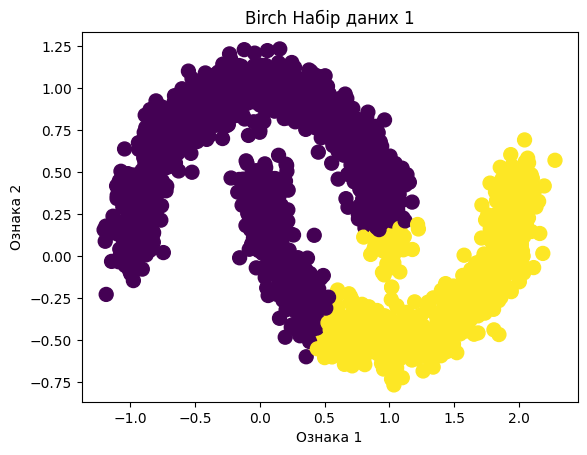

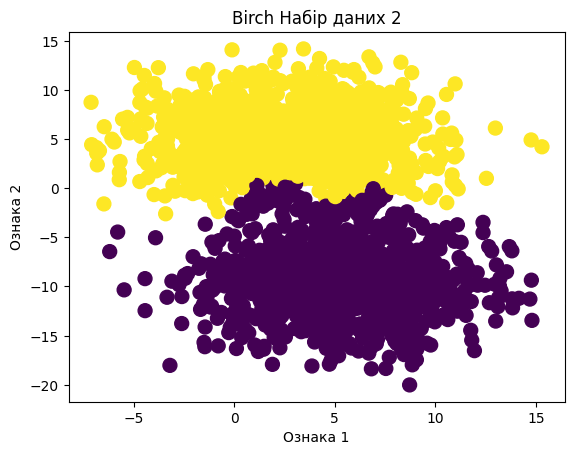

In [23]:
from sklearn.cluster import Birch

birch_1 = Birch(n_clusters=2, threshold=0.5, branching_factor=100)
y_birch_1 = birch_1.fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y_birch_1)
plt.title('Birch Набір даних 1')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.show()

birch_2 = Birch(n_clusters=2, threshold=0.1, branching_factor=100)
y_birch_2 = birch_2.fit_predict(X3)
plt.scatter(X3[:, 0], X3[:, 1], s=100, c=y_birch_2)
plt.title('Birch Набір даних 2')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.show()

In [24]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

silhouette_1 = silhouette_score(X1, y_birch_1)
ari_1 = adjusted_rand_score(Y1, y_birch_1)
nmi_1 = normalized_mutual_info_score(Y1, y_birch_1)
print('Набір даних 1 - Silhouette Score: {:.4f}'.format(silhouette_1))
print('Набір даних 1 - ARI Score: {:.4f}'.format(ari_1))
print('Набір даних 1 - NMI Score: {:.4f}'.format(nmi_1))

Набір даних 1 - Silhouette Score: 0.4584
Набір даних 1 - ARI Score: 0.3767
Набір даних 1 - NMI Score: 0.3414


In [25]:
silhouette_2 = silhouette_score(X3, y_birch_2)
ari_2 = adjusted_rand_score(Y3, y_birch_2)
nmi_2 = normalized_mutual_info_score(Y3, y_birch_2)
print('Набір даних 2 - Silhouette Score: {:.4f}'.format(silhouette_2))
print('Набір даних 2 - ARI Score: {:.4f}'.format(ari_2))
print('Набір даних 2 - NMI Score: {:.4f}'.format(nmi_2))

Набір даних 2 - Silhouette Score: 0.5761
Набір даних 2 - ARI Score: 0.8723
Набір даних 2 - NMI Score: 0.8102


### DBSCAN

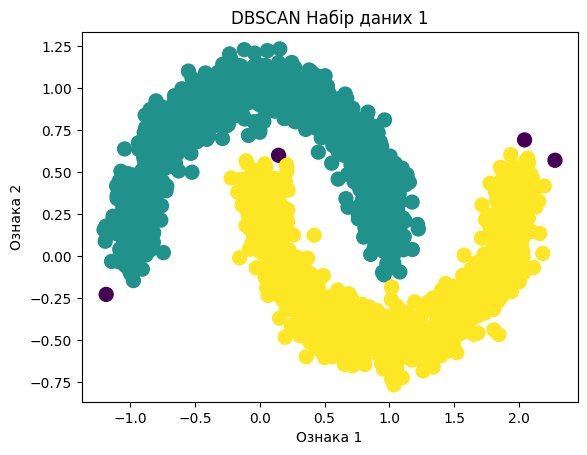

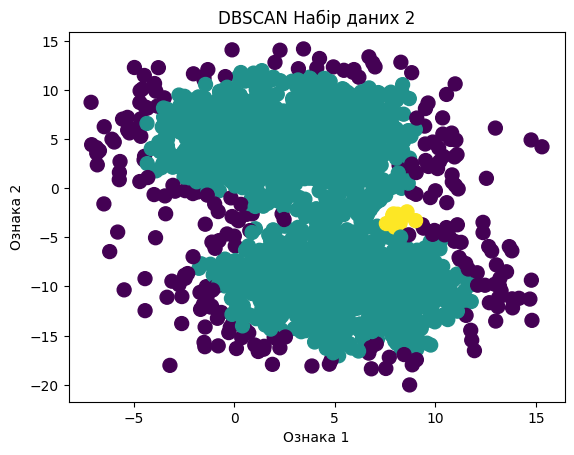

In [26]:
from sklearn.cluster import DBSCAN

dbscan_1 = DBSCAN(eps=0.2, min_samples=70)
y_dbscan_1 = dbscan_1.fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y_dbscan_1)
plt.title('DBSCAN Набір даних 1')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.show()

dbscan_2 = DBSCAN(eps=1, min_samples=10)
y_dbscan_2 = dbscan_2.fit_predict(X3)
plt.scatter(X3[:, 0], X3[:, 1], s=100, c=y_dbscan_2)
plt.title('DBSCAN Набір даних 2')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.show()

In [27]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

silhouette_dbscan_1 = silhouette_score(X1, y_dbscan_1)
ari_dbscan_1 = adjusted_rand_score(Y1, y_dbscan_1)
nmi_dbscan_1 = normalized_mutual_info_score(Y1, y_dbscan_1)
print('Набір даних 1 (DBSCAN) - Silhouette Score:{:.4f}'.
      format(silhouette_dbscan_1))
print('Набір даних 1 (DBSCAN) - ARI Score:{:.4f}'.format(ari_dbscan_1))
print('Набір даних 1 (DBSCAN) - NMI Score:{:.4f}'.format(nmi_dbscan_1))

Набір даних 1 (DBSCAN) - Silhouette Score:0.3011
Набір даних 1 (DBSCAN) - ARI Score:0.9920
Набір даних 1 (DBSCAN) - NMI Score:0.9788


In [28]:
silhouette_dbscan_2 = silhouette_score(X3, y_dbscan_2)
ari_dbscan_2 = adjusted_rand_score(Y3, y_dbscan_2)
nmi_dbscan_2 = normalized_mutual_info_score(Y3, y_dbscan_2)
print('Набір даних 2 (DBSCAN) - Silhouette Score:{:.4f}'.
      format(silhouette_dbscan_2))
print('Набір даних 2 (DBSCAN) - ARI Score:{:.4f}'.format(ari_dbscan_2))
print('Набір даних 2 (DBSCAN) - NMI Score:{:.4f}'.format(nmi_dbscan_2))

Набір даних 2 (DBSCAN) - Silhouette Score:-0.1626
Набір даних 2 (DBSCAN) - ARI Score:-0.0002
Набір даних 2 (DBSCAN) - NMI Score:0.0022


Можна зазначити, що успішність алгоритмів залежить від характеристик наборів даних.

# K-Means, Affinity propagation

In [30]:
mall_data = pd.read_csv('Mall_Customers.csv')
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
dbscan = DBSCAN(eps=12.6, min_samples=4)
y_dbscan = dbscan.fit_predict(X_numerics)

### K-Means

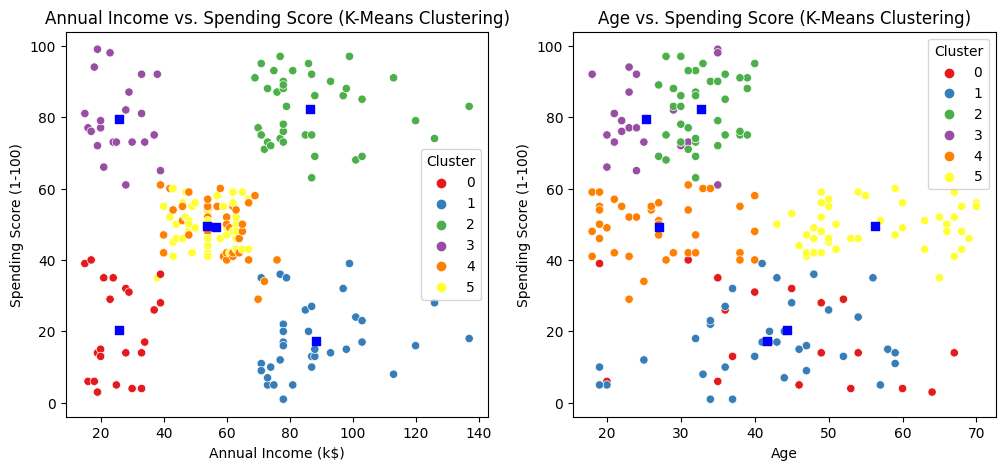

In [31]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=6, init='k-means++').fit(X_numerics)
k_means_clustered = X_numerics.copy()
k_means_clustered.loc[:, 'Cluster'] = k_means.labels_

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=k_means_clustered, hue='Cluster', ax=axes[0],
                palette='Set1', legend='full')
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=k_means_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')
axes[0].scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2],
                marker='s', s=40, c="blue")
axes[1].scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 2],
                marker='s', s=40, c="blue")
axes[0].set_title('Annual Income vs. Spending Score (K-Means Clustering)')
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')
axes[1].set_title('Age vs. Spending Score (K-Means Clustering)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Spending Score (1-100)')

plt.show()

In [32]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

silhouette_kmeans = silhouette_score(X_numerics, k_means.labels_)
ari_kmeans = adjusted_rand_score(y_dbscan, k_means.labels_)
nmi_kmeans = normalized_mutual_info_score(y_dbscan, k_means.labels_)

print('K-Means Silhouette Score: {:.4f}'.format(silhouette_kmeans))
print('K-Means ARI Score: {:.4f}'.format(ari_kmeans))
print('K-Means NMI Score: {:.4f}'.format(nmi_kmeans))

K-Means Silhouette Score: 0.4524
K-Means ARI Score: 0.3478
K-Means NMI Score: 0.5649


### Affinity propagation

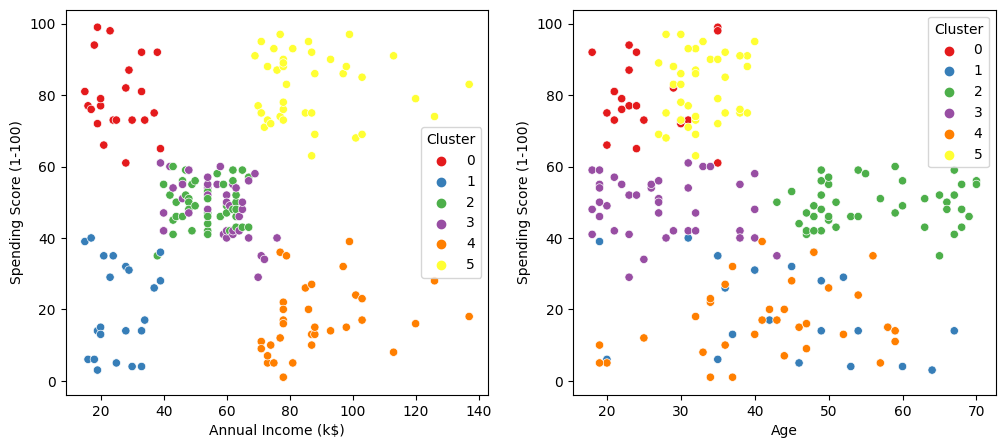

In [33]:
from sklearn.cluster import AffinityPropagation

af = AffinityPropagation(preference=-11800).fit(X_numerics)
af_clustered = X_numerics.copy()
af_clustered.loc[:, 'Cluster'] = af.labels_

AF_clust_sizes = af_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]

fig, ax_af = plt.subplots(1, 2, figsize=(12, 5))
scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                         data=af_clustered, hue='Cluster', ax=ax_af[0],
                         palette='Set1', legend='full')
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=af_clustered,
                hue='Cluster', palette='Set1', ax=ax_af[1], legend='full')
plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')

plt.show()

In [34]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

silhouette_af = silhouette_score(X_numerics, af.labels_)
ari_af = adjusted_rand_score(y_dbscan, af.labels_)
nmi_af = normalized_mutual_info_score(y_dbscan, af.labels_)

print('AffinityPropagation Silhouette Score:{:.4f}'.format(silhouette_af))
print('AffinityPropagation ARI Score: {:.4f}'.format(ari_af))
print('AffinityPropagation NMI Score: {:.4f}'.format(nmi_af))

AffinityPropagation Silhouette Score:0.4516
AffinityPropagation ARI Score: 0.3562
AffinityPropagation NMI Score: 0.5737


Ми можемо помітити, що Affinity propagation виявився більш ефективним, ніж K-Means.

# Висновок

У даному дослідженні ми аналізували основні алгоритми машинного навчання, такі як класифікатор наївних байєсів, векторна машина підтримки, метод k-найближчих сусідів, Агнес, DBSCAN та афінне поширення k-ти. Ми візуалізували кластери і досліджували основні показники якості для завдань класифікації і кластеризації. Проведено порівняльний аналіз цих алгоритмів машинного навчання.